## Conclusion

1. For this driving company analysis, it is clear that drivers in urband environments are paid more because of the rate of rides and volume of rides.
2.  A whoping 78% of drivers are in urban areas, while fares in urban areas take up 62%.  That means there are more rides to share in urban areas.  

In [1]:
# Import Dependicies
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd


In [2]:
# Read in city Data

city_data_path = "raw_data/city_data.csv"
city_df = pd.read_csv(city_data_path)

city_df.head()


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
# Read drive data

ride_data_path = "raw_data/ride_data.csv"
ride_df = pd.read_csv(ride_data_path)

ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:

# Total of Rides Per City

city_ride_count = ride_df['city'].value_counts()
city_ride_count.head()

Swansonbury      34
Port Johnstad    34
Port James       32
South Louis      32
West Peter       31
Name: city, dtype: int64

In [5]:
# Fare Total Per City

city_fare_sum = ride_df.groupby('city')['fare'].sum()
city_fare_sum.head()

city
Alvarezhaven    741.79
Alyssaberg      535.85
Anitamouth      335.84
Antoniomouth    519.75
Aprilchester    417.65
Name: fare, dtype: float64

In [6]:
# Average Fare Per City

avg_fare_per_city = (city_fare_sum / city_ride_count).round(2)
avg_fare_per_city.head()

Alvarezhaven    23.93
Alyssaberg      20.61
Anitamouth      37.32
Antoniomouth    23.62
Aprilchester    21.98
dtype: float64

In [7]:
# Make value findings a data frame

city_ride_count = pd.DataFrame(city_ride_count)
city_ride_count.reset_index(inplace=True)


city_ride_count.head()

,index,city
0,Swansonbury,34
1,Port Johnstad,34
2,Port James,32
3,South Louis,32
4,West Peter,31


In [8]:
city_ride_count = city_ride_count.rename(columns = {'city' : 'ride count',
                                                   'index' : 'city',})
city_ride_count.head()

,city,ride count
0,Swansonbury,34
1,Port Johnstad,34
2,Port James,32
3,South Louis,32
4,West Peter,31


In [9]:
# Create Data Frame for fare sum
city_fare_sum = pd.DataFrame(city_fare_sum)
city_fare_sum.reset_index(inplace=True)
city_fare_sum.head()


,city,fare
0,Alvarezhaven,741.79
1,Alyssaberg,535.85
2,Anitamouth,335.84
3,Antoniomouth,519.75
4,Aprilchester,417.65


In [10]:
# Rename Columns
city_fare_sum = city_fare_sum.rename(columns = {'fare' : 'total city fare'})
city_fare_sum.head()

,city,total city fare
0,Alvarezhaven,741.79
1,Alyssaberg,535.85
2,Anitamouth,335.84
3,Antoniomouth,519.75
4,Aprilchester,417.65


In [11]:
# Create data frame for average 
avg_fare_per_city = pd.DataFrame(avg_fare_per_city)
avg_fare_per_city.reset_index(inplace=True)


In [12]:
avg_fare_per_city = avg_fare_per_city.rename(columns = {'index' : 'city', 
                                                        0 : 'average fare per city'})

avg_fare_per_city.head()

,city,average fare per city
0,Alvarezhaven,23.93
1,Alyssaberg,20.61
2,Anitamouth,37.32
3,Antoniomouth,23.62
4,Aprilchester,21.98


In [13]:
# Merge 1

merge_one = pd.merge(city_df, city_ride_count, on='city')
merge_one.head()

,city,driver_count,type,ride count
0,Kelseyland,63,Urban,28
1,Nguyenbury,8,Urban,26
2,East Douglas,12,Urban,22
3,West Dawnfurt,34,Urban,29
4,Rodriguezburgh,52,Urban,23


In [14]:
# Merge 2 

drive_df = pd.merge(merge_one, avg_fare_per_city, on='city')
drive_df.head()

,city,driver_count,type,ride count,average fare per city
0,Kelseyland,63,Urban,28,21.81
1,Nguyenbury,8,Urban,26,25.90
2,East Douglas,12,Urban,22,26.17
3,West Dawnfurt,34,Urban,29,22.33
4,Rodriguezburgh,52,Urban,23,21.33


In [15]:
# Merge 3 : Final Merge

drive_df = pd.merge(drive_df, city_fare_sum, on='city')
drive_df.head()

,city,driver_count,type,ride count,average fare per city,total city fare
0,Kelseyland,63,Urban,28,21.81,610.58
1,Nguyenbury,8,Urban,26,25.90,673.39
2,East Douglas,12,Urban,22,26.17,575.72
3,West Dawnfurt,34,Urban,29,22.33,647.58
4,Rodriguezburgh,52,Urban,23,21.33,490.65


In [16]:
# Size of Bubble = Drivers Per City
# x axis = Rides Per City
# y axis = Average Fares
# City Type = Bubble Color


In [17]:
# Select city types for each scatter plot

urban_drive = drive_df.loc[drive_df['type'] == 'Urban']

suburban_drive = drive_df.loc[drive_df['type'] == 'Suburban']

rural_drive = drive_df.loc[drive_df['type'] == 'Rural']



In [18]:
urban_rides = urban_drive['ride count']
urban_drivers = urban_drive['driver_count']
urban_fare = urban_drive['average fare per city']

suburban_rides = suburban_drive['ride count']
suburban_drivers = suburban_drive['driver_count']
suburban_fare = suburban_drive['average fare per city']

rural_rides = rural_drive['ride count']
rural_drivers = rural_drive['driver_count']
rural_fare = rural_drive['average fare per city']



plt.scatter(urban_rides, urban_fare,  marker = 'o', edgecolors='black',
           s=urban_drivers*5, c='lightcoral', label='Urban', alpha=0.75)

plt.scatter(suburban_rides, suburban_fare, marker = 'o', edgecolors='black', 
           s = suburban_drivers*5, c='lightskyblue', label='Suburban', alpha=0.75)

plt.scatter(rural_rides, rural_fare,  marker = 'o', edgecolors='black',
           s = rural_drivers*5, c='gold', label='Rural', alpha=0.75)


 

In [19]:
# y limit
plt.ylim(15,45)

(15, 45)

In [20]:
# x limit
plt.xlim(0, 40)


plt.grid()
plt.title('Pyber Ride Sharing Data 2016')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare($)')
plt.legend(loc='best', title='City Type')
plt.text(43, 0.50, r'Note: Circle size correlates to driver count per city.')

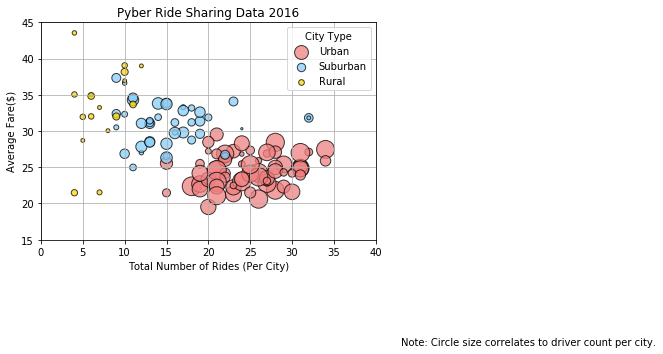

In [21]:
plt.show()

In [22]:
# Set the 'city' to be the new index for easy referencing of rows

drive_df = drive_df.set_index('city')

In [23]:
# % of total fares by city type

# Select columns for % of total fares by city type

city_type_total = drive_df.groupby('type')['total city fare'].sum()
city_type_total = pd.DataFrame(city_type_total)
city_type_total.reset_index(inplace = True)
city_type_total


,type,total city fare
0,Rural,4255.09
1,Suburban,20335.69
2,Urban,40078.34


In [24]:
# Label city Types
city_type = city_type_total['type']

# Values for pie chart
total_city_fare = city_type_total['total city fare']

# Colors
colors = ['gold', 'lightskyblue', 'lightcoral']

# Explode
explode = (0, 0, 0.1)


In [25]:
# Create pie & find percentages

total_city_fare_pie = plt.pie(total_city_fare, explode=explode,  labels = city_type, colors = colors, 
       autopct = "%1.1f%%", shadow=True, startangle = 140)

In [26]:
# Make it an equal perfect circle
plt.axis('equal')

(-1.1176639226730507,
 1.194567077744406,
 -1.1162114572424728,
 1.1625457019480223)

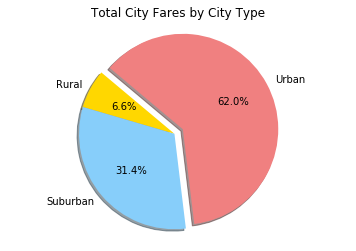

In [27]:
plt.title('Total City Fares by City Type')
plt.show()

In [28]:
# % of Total Rides by City Type
total_rides_type = drive_df.groupby('type')['ride count'].sum()
total_rides_type = pd.DataFrame(total_rides_type)
total_rides_type.reset_index(inplace = True)
total_rides_type

,type,ride count
0,Rural,125
1,Suburban,657
2,Urban,1625


In [29]:
# Labels
city_type = total_rides_type['type']

# Values
ride_count = total_rides_type['ride count']

# Colors
colors = ['gold', 'lightskyblue', 'lightcoral']

# Explode
explode = (0, 0, 0.1)



In [30]:
# Create pie & find percentages

total_ride_type_pie = plt.pie(ride_count, labels = city_type, explode=explode, colors = colors, 
       autopct = "%1.1f%%", shadow=True,  startangle = 140)

In [31]:
# Make it equal
plt.axis('equal')

(-1.1123696934546474,
 1.2158375011175826,
 -1.0841229924841567,
 1.1488001653602169)

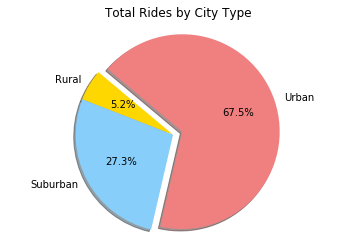

In [32]:
plt.title('Total Rides by City Type')
plt.show()

In [33]:
# of Total Drivers by City Type
total_driver_type = drive_df.groupby('type')['driver_count'].sum()
total_driver_type = pd.DataFrame(total_driver_type)
total_driver_type.reset_index(inplace = True)
total_driver_type

,type,driver_count
0,Rural,104
1,Suburban,638
2,Urban,2607


In [34]:
# Labels
city_type = total_driver_type['type']

# Values
driver_count = total_driver_type['driver_count']

# Colors
colors = ['gold', 'lightskyblue', 'lightcoral']

# Explode
explode = (0, 0, 0.1)


In [35]:
# Create pie & find percentages

total_ride_type_pie = plt.pie(driver_count, labels = city_type, explode=explode, colors = colors, 
       autopct = "%1.1f%%", shadow=True, startangle = 140)

In [36]:
# Make it equal
plt.axis('equal')

(-1.120345126658332,
 1.2059511864497128,
 -1.1038487708834486,
 1.1036806907057752)

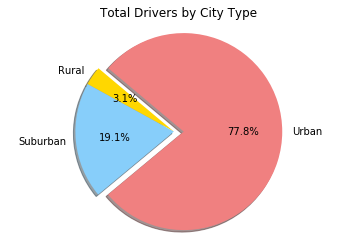

In [37]:
plt.title('Total Drivers by City Type')
plt.show()